In [275]:
import pandas as pd

In [276]:
data = pd.read_csv('../data/train.csv')

In [277]:
data.shape

(891, 12)

In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [279]:
data = data.drop('Cabin', axis=1)
data = data.dropna(subset=['Age'])
data = data.dropna(subset=['Embarked'])
data = data.drop('Name', axis=1)
data = data.drop('PassengerId', axis=1)
data = data.drop('Ticket', axis=1)

In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [281]:
# KNN - Bayes - SVM
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import sklearn.impute as imp
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [282]:
le = LabelEncoder()
stringColumns = ['Sex', 'Embarked']
data[stringColumns] = data[stringColumns].astype(str).apply(lambda x: le.fit_transform(x))

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [283]:
x_train, x_test, y_train, y_test = train_test_split(data.drop("Survived", axis=1),  data["Survived"], test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)

p = knn.predict(x_test)

print("KNN accuracy: ", knn.score(x_test, y_test))
c1 = confusion_matrix(y_test, p)

#grafica el heatmap
sns.heatmap(c, annot=True, cmap="Blues")


KNN accuracy:  0.6783216783216783


<Axes: >

In [284]:
svm = SVC(kernel='linear', C=1, gamma=1)
svm.fit(x_train, y_train)

p = svm.predict(x_test)
print("SVM accuracy: ", svm.score(x_test, y_test))
c2 = confusion_matrix(y_test, p)

SVM accuracy:  0.7482517482517482


In [285]:
bayes = GaussianNB()
bayes.fit(x_train, y_train)

p = bayes.predict(x_test)
print("Bayes accuracy: ", bayes.score(x_test, y_test))
c3 = confusion_matrix(y_test, p)

Bayes accuracy:  0.7622377622377622


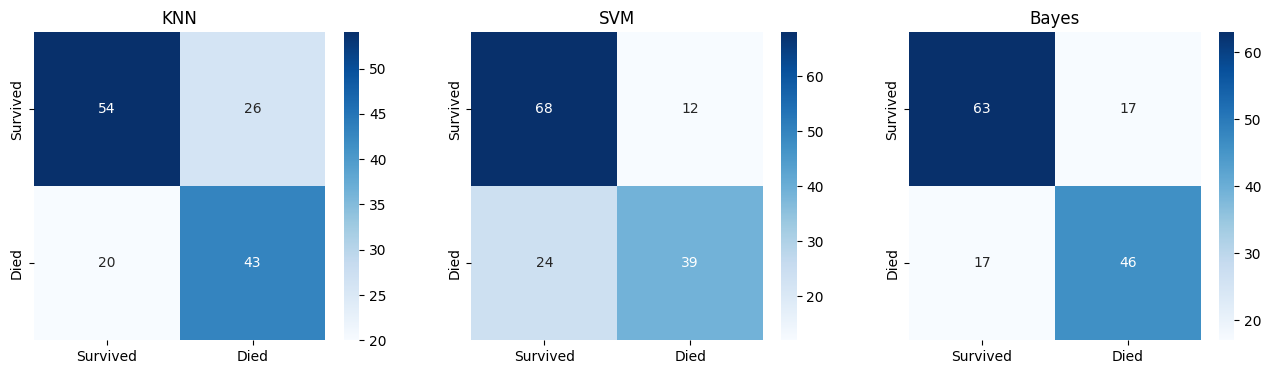

In [288]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))
titles = ['KNN','SVM', 'Bayes']
cms = [c1, c2, c3]
for i, ax in enumerate(axes.flat):
    sns.heatmap(pd.DataFrame(cms[i], index=['Survived', 'Died'], columns=['Survived', 'Died']), annot=True, cmap='Blues', ax=ax, fmt='g')
    ax.set(title=titles[i])
plt.show()